In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/gene-expression/data_set_ALL_AML_independent.csv
/kaggle/input/gene-expression/data_set_ALL_AML_train.csv
/kaggle/input/gene-expression/actual.csv


In [2]:
import pandas as pd
import numpy as np

df_train = pd.read_csv("/kaggle/input/gene-expression/data_set_ALL_AML_train.csv")
df_test= pd.read_csv("/kaggle/input/gene-expression/data_set_ALL_AML_independent.csv")
df_labels = pd.read_csv("/kaggle/input/gene-expression/actual.csv")

df_train_clean = df_train.drop(columns=['Gene Description', 'Gene Accession Number'])
X_train = df_train_clean.T
X_train.reset_index(drop=True, inplace=True)

In [3]:
X_train['patient'] = X_train.index.astype(str)

In [4]:
df_labels['patient'] = df_labels['patient'].astype(str)
X_train_labeled = pd.merge(X_train, df_labels, on='patient', how='inner')

In [5]:
X_train_labeled.drop(columns=['patient'], inplace=True)

In [6]:
X_train_labeled.head()

,0,1,2,3,4,5,6,7,8,9,...,7120,7121,7122,7123,7124,7125,7126,7127,7128,cancer
0,A,A,A,A,A,A,A,A,A,A,...,A,A,P,A,A,A,A,A,A,ALL
1,-139,-73,-1,283,-264,-400,-330,-168,101,74,...,837,-36,442,-17,782,295,11,76,-14,ALL
2,A,A,A,A,A,A,A,A,A,A,...,A,A,A,A,A,A,A,A,A,ALL
3,-76,-49,-307,309,-376,-650,33,-367,206,-215,...,1199,33,168,52,1138,777,41,228,-41,ALL
4,A,A,A,A,A,A,A,A,A,A,...,A,A,A,A,A,P,A,A,A,ALL


In [7]:
X = X_train_labeled.drop(columns=['cancer'])
y = X_train_labeled['cancer']

print("Final shapes after merge:")
print("X:", X.shape)
print("y:", y.shape)

Final shapes after merge:
X: (72, 7129)
y: (72,)


In [8]:
!pip install umap-learn


In [9]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,7119,7120,7121,7122,7123,7124,7125,7126,7127,7128
0,A,A,A,A,A,A,A,A,A,A,...,A,A,A,P,A,A,A,A,A,A
1,-139,-73,-1,283,-264,-400,-330,-168,101,74,...,169,837,-36,442,-17,782,295,11,76,-14
2,A,A,A,A,A,A,A,A,A,A,...,A,A,A,A,A,A,A,A,A,A
3,-76,-49,-307,309,-376,-650,33,-367,206,-215,...,315,1199,33,168,52,1138,777,41,228,-41
4,A,A,A,A,A,A,A,A,A,A,...,P,A,A,A,A,A,P,A,A,A


In [10]:
X_numeric = X.apply(pd.to_numeric, errors='coerce')  
X_numeric = X_numeric.dropna(axis=0, how='any')     


y_filtered = y.loc[X_numeric.index]  #

print("✅ Filtered X shape:", X_numeric.shape)
print("✅ Filtered y shape:", y_filtered.shape)


✅ Filtered X shape: (36, 7129)
✅ Filtered y shape: (36,)


In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap.umap_ as umap
import matplotlib.pyplot as plt
import seaborn as sns


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numeric)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

umap_model = umap.UMAP(n_components=2, random_state=42)
X_umap = umap_model.fit_transform(X_scaled)



2025-06-02 15:50:33.777542: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748879434.094053      14 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748879434.183602      14 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


/tmp/ipykernel_14/667979956.py:21: UserWarning: Glyph 129516 (\N{DNA DOUBLE HELIX}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129516 (\N{DNA DOUBLE HELIX}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


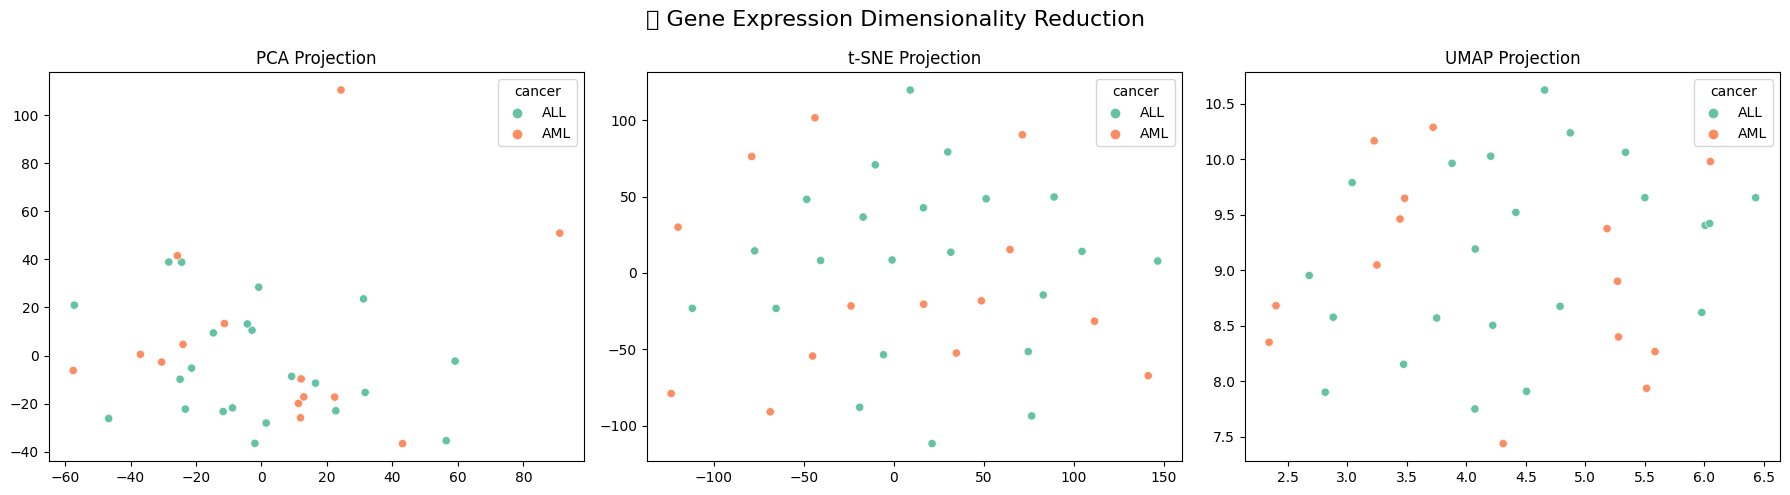

In [12]:
y_final = y_filtered.reset_index(drop=True)

plt.figure(figsize=(18, 5))

# PCA
plt.subplot(1, 3, 1)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y_final, palette='Set2')
plt.title('PCA Projection')

# t-SNE
plt.subplot(1, 3, 2)
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=y_final, palette='Set2')
plt.title('t-SNE Projection')

# UMAP
plt.subplot(1, 3, 3)
sns.scatterplot(x=X_umap[:, 0], y=X_umap[:, 1], hue=y_final, palette='Set2')
plt.title('UMAP Projection')

plt.suptitle('🧬 Gene Expression Dimensionality Reduction', fontsize=16)
plt.tight_layout()
plt.show()


🔍 Logistic Regression Report:
               precision    recall  f1-score   support

         ALL       0.67      0.80      0.73         5
         AML       0.50      0.33      0.40         3

    accuracy                           0.62         8
   macro avg       0.58      0.57      0.56         8
weighted avg       0.60      0.62      0.60         8

🔍 SVM Report:
               precision    recall  f1-score   support

         ALL       0.67      0.80      0.73         5
         AML       0.50      0.33      0.40         3

    accuracy                           0.62         8
   macro avg       0.58      0.57      0.56         8
weighted avg       0.60      0.62      0.60         8



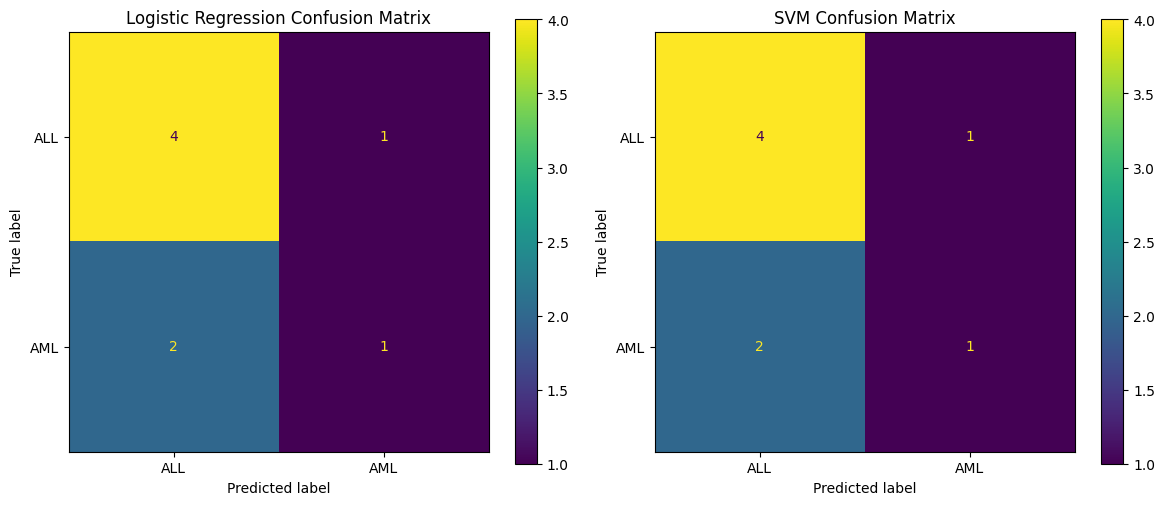

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(
    X_numeric, y_filtered, test_size=0.2, random_state=42, stratify=y_filtered
)

#  Logistic Regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_split, y_train_split)
y_pred_logreg = logreg.predict(X_test_split)

# Support Vector Machine
svm_model = SVC(kernel='linear', probability=True)
svm_model.fit(X_train_split, y_train_split)
y_pred_svm = svm_model.predict(X_test_split)

#  Evaluation
print("🔍 Logistic Regression Report:\n", classification_report(y_test_split, y_pred_logreg))
print("🔍 SVM Report:\n", classification_report(y_test_split, y_pred_svm))

# Confusion Matrix
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
ConfusionMatrixDisplay.from_estimator(logreg, X_test_split, y_test_split, ax=axs[0])
axs[0].set_title("Logistic Regression Confusion Matrix")
ConfusionMatrixDisplay.from_estimator(svm_model, X_test_split, y_test_split, ax=axs[1])
axs[1].set_title("SVM Confusion Matrix")
plt.tight_layout()
plt.show()